In [2]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

C:\Users\ADMIN\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
df6012 = web.DataReader('6012.KL', data_source='yahoo', start='2011-03-12',end='2020-03-12')

In [4]:
df6012['Difference'] = df6012['Open'] - df6012['Close']
df6012.head()

,High,Low,Open,Close,Volume,Adj Close,Difference
Date,,,,,,,
2011-03-14,5.41,5.35,5.40,5.39,3479700.0,3.575402,0.01
2011-03-15,5.39,5.36,5.38,5.37,4481900.0,3.562135,0.01
2011-03-16,5.38,5.34,5.36,5.36,4017800.0,3.555503,0.00
2011-03-17,5.36,5.33,5.35,5.35,3148300.0,3.548868,0.00
2011-03-18,5.40,5.34,5.35,5.40,3830400.0,3.582035,-0.05


In [5]:
df6012.tail()

,High,Low,Open,Close,Volume,Adj Close,Difference
Date,,,,,,,
2020-03-06,5.45,5.36,5.37,5.43,1813100.0,5.43,-0.06
2020-03-09,5.46,5.30,5.38,5.31,3013200.0,5.31,0.07
2020-03-10,5.37,5.25,5.29,5.25,3148600.0,5.25,0.04
2020-03-11,5.31,5.21,5.27,5.27,3875400.0,5.27,0.00
2020-03-12,5.31,5.20,5.25,5.25,2038200.0,5.25,0.00


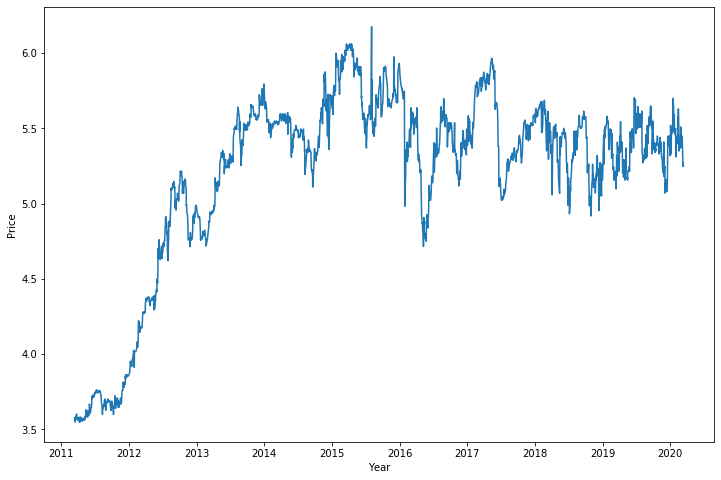

In [6]:
plt.figure(figsize = (12,8))
plt.plot(df6012['Adj Close'])
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

In [7]:
df6012.to_csv('maxis.csv')

In [8]:
dfPre = []
dfPre = df6012[['Adj Close']]

In [9]:
print(dfPre.head())

            Adj Close
Date                 
2011-03-14   3.575402
2011-03-15   3.562135
2011-03-16   3.555503
2011-03-17   3.548868
2011-03-18   3.582035


In [10]:
forecast_out = 30 #predict n days into the future, in this case, 30
dfPre['Prediction'] = dfPre[['Adj Close']].shift(-forecast_out)
print(dfPre.head())

            Adj Close  Prediction
Date                             
2011-03-14   3.575402    3.555503
2011-03-15   3.562135    3.562135
2011-03-16   3.555503    3.568769
2011-03-17   3.548868    3.562135
2011-03-18   3.582035    3.562135


C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
X = np.array(dfPre.drop(['Prediction'], 1))
len(X)

2225

In [12]:
#reserving 60 data for testing
X_new = X[0:2165]
len(X_new) + 60

2225

In [13]:
X_new[0:10]

array([[3.57540226],
       [3.56213546],
       [3.55550337],
       [3.54886842],
       [3.5820353 ],
       [3.56876922],
       [3.56876922],
       [3.56876922],
       [3.60193563],
       [3.5820353 ]])

In [14]:
y = np.array(dfPre['Prediction'])
y_new = y[:-60]
len(y_new)

2165

In [15]:
y_new[0:10]

array([3.55550337, 3.56213546, 3.56876922, 3.56213546, 3.56213546,
       3.57540226, 3.56876922, 3.56876922, 3.56213546, 3.56876922])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.2)

In [17]:
y = np.array(dfPre['Prediction'])
y = y[:-forecast_out]
print(y)
len(y)

[3.55550337 3.56213546 3.56876922 ... 5.25       5.26999998 5.25      ]


2195

In [18]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
y_pre = lr.predict(X[2195:2225])
print("Predicted last 30 days")
print(y_pre)

Predicted last 30 days
[5.323152   5.36731622 5.43797864 5.43797864 5.40264743 5.44681123
 5.41148002 5.40264743 5.56163787 5.49097545 5.6058021  5.47330985
 5.35848321 5.37614881 5.40264743 5.43797864 5.39381442 5.44681123
 5.37614881 5.49980847 5.42914563 5.44681123 5.38498183 5.44681123
 5.38498183 5.42914563 5.323152   5.27015518 5.28782079 5.27015518]


In [21]:
confidence = lr.score(X_test, y_test)
print("Confidence Score: ", confidence)

Confidence Score:  0.8402147595654695


In [22]:
x_forecast = np.array(dfPre.drop(['Prediction'], 1))[-forecast_out:]
print("Actual last 30 days: ")
print(x_forecast)

Actual last 30 days: 
[[5.30999994]
 [5.36000013]
 [5.44000006]
 [5.44000006]
 [5.4000001 ]
 [5.44999981]
 [5.40999985]
 [5.4000001 ]
 [5.57999992]
 [5.5       ]
 [5.63000011]
 [5.48000002]
 [5.3499999 ]
 [5.36999989]
 [5.4000001 ]
 [5.44000006]
 [5.38999987]
 [5.44999981]
 [5.36999989]
 [5.51000023]
 [5.42999983]
 [5.44999981]
 [5.38000011]
 [5.44999981]
 [5.38000011]
 [5.42999983]
 [5.30999994]
 [5.25      ]
 [5.26999998]
 [5.25      ]]


Text(0, 0.5, 'Price')

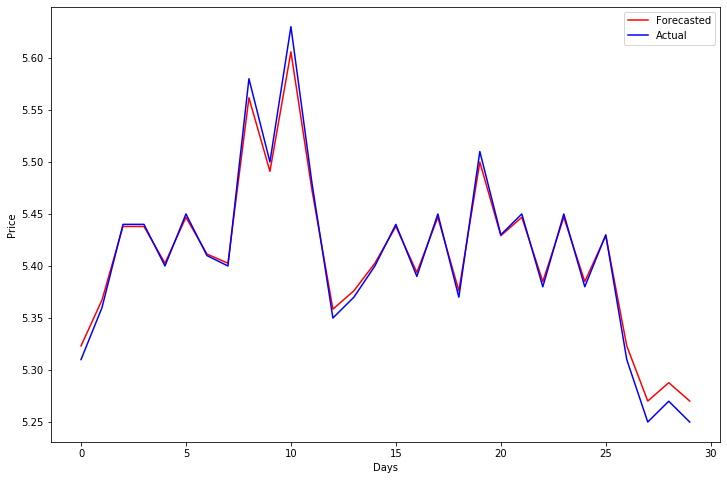

In [24]:
plt.figure(figsize = (12,8))
plt.plot(y_pre, color='r')
plt.plot(x_forecast, color='b')
plt.legend(['Forecasted', 'Actual'])
plt.xlabel("Days")
plt.ylabel("Price")